In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
select_columns = ['아파트 브랜드', '층', '건축년도', '주택수주액', '경상수지', '대출금액',
                   '동수(호)', '임금총액','S&P500변동률','계약연도','구'] 

In [3]:
data = pd.read_csv("./top5_data_after_target_encoding_no_clustering.csv", encoding='cp949')

In [4]:
data

,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,매칭구,평당가
0,5148.718800,8,2019,9277921,4933751,94.3,6708,3935,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,7236.162408,9647.193456
1,5148.718800,9,2019,9277921,4933751,94.3,6708,3935,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,7236.162408,9457.011996
2,5148.718800,10,2019,7187557,5327314,94.3,-4024,-1663,20871.755,16239.20130,...,0.029000,1187.44,9.01,1947.56,10.99,645.18,13.37,4557.982620,7236.162408,9922.827555
3,5148.718800,10,2019,10945748,8624217,94.1,1942,193,18127.483,14229.74914,...,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,7236.162408,8951.081313
4,5148.718800,24,2019,10945748,8624217,94.1,1942,193,18127.483,14229.74914,...,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,7236.162408,9768.698964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14660,4662.681663,26,2008,6911022,4483275,101.4,1630,-6739,14446.593,13766.35055,...,-0.002573,1353.43,6.25,2293.61,6.41,695.33,3.37,5128.702256,4370.215888,3680.023030
14661,4662.681663,22,2008,14731854,10055966,96.3,2677,-4774,33635.767,32146.35769,...,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888,2453.348687
14662,4662.681663,33,2008,14731854,10055966,96.3,2677,-4774,33635.767,32146.35769,...,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888,3620.330546
14663,4662.681663,22,2008,14731854,10055966,96.3,2677,-4774,33635.767,32146.35769,...,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888,3306.957161


In [5]:
data.columns

Index(['아파트 브랜드', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도',
       '매칭구', '평당가'],
      dtype='object')

In [6]:
column_rename_dict = {
    '계약년월': '계약연월', 
    '층': '층', 
    '매칭구': '구', 
    '건축년도': '건축년도', 
    '건설수주_건축(단위 백만원)': '건축수주액', 
    '건설수주_주택(단위 백만원)': '주택수주액', 
    '매매가격지수(아파트)': '매매가격지수', 
    '경상수지(백만불)': '경상수지', 
    '무역수지(백만불)': '무역수지', 
    '대출금액(아파트)(억원)': '대출금액', 
    '대출잔액(아파트)(억원)': '대출잔액', 
    '서울_신규_분양세대(단위: 세대)': '신규분양세대', 
    '아파트 동(호)수_(단위: 호)': '동수(호)', 
    '아파트 건물면적_(천)': '건물면적', 
    '생산자물가지수 총지수 ': '생산자물가지수', 
    '전규모(1인이상) 전체임금총액[원]': '임금총액', 
    '소비자물가지수 총지수 ': '소비자물가지수', 
    '소비자물가지수 주택, 수도, 전기 및 연료': '주택관련물가지수', 
    '가계대출 (연리%)': '가계대출금리', 
    '경기종합지수(2020=100)': '경기종합지수', 
    '경제활동인구_ 실업률(단위: %)': '실업률', 
    '경제활동인구_고용률(단위: %)': '고용률', 
    '경제활동인구_취업자(단위: 천명)': '취업자수', 
    '국제 주요국 주가지수(KOSPI)': 'KOSPI지수', 
    '예금은행 대출금리(신규취급액 기준)_대출평균(연%)': '신규대출금리', 
    '예금은행 대출금리(잔액 기준)_총대출(연리%)': '총대출금리', 
    '주택매매가격지수(KB)_서울': '서울주택가격지수', 
    '소비자물가지수_총지수(가중치:1000?)': '가중치소비자물가지수', 
    '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원': '환율', 
    'S&P 500_close': 'S&P500종가', 
    'S&P 500_change_rate': 'S&P500변동률', 
    'NASDAQ_close': '나스닥종가', 
    'NASDAQ_change_rate': '나스닥변동률', 
    'DOW Jones_close': '다우존스종가', 
    'DOW Jones_change_rate': '다우존스변동률', 
    'KRX300_close': 'KRX300종가', 
    'KRX300_change_rate': 'KRX300변동률', 
    'KOSPI_close': 'KOSPI종가', 
    'KOSPI_change_rate': 'KOSPI변동률', 
    'KOSDAQ_close': 'KOSDAQ종가', 
    'KOSDAQ_change_rate': 'KOSDAQ변동률', 
    '평당가': '평당가'
}


data = data.rename(columns=column_rename_dict)


In [7]:
data.isnull().sum()

아파트 브랜드       0
층             0
건축년도          0
건축수주액         0
주택수주액         0
매매가격지수        0
경상수지          0
무역수지          0
대출금액          0
대출잔액          0
신규분양세대        0
동수(호)         0
생산자물가지수       0
임금총액          0
소비자물가지수       0
주택관련물가지수      0
가계대출금리        0
경기종합지수        0
실업률           0
고용률           0
취업자수          0
KOSPI지수       0
신규대출금리        0
총대출금리         0
서울주택가격지수      0
가중치소비자물가지수    0
환율            0
경기종합지수        0
S&P500종가      0
S&P500변동률     0
나스닥종가         0
나스닥변동률        0
다우존스종가        0
다우존스변동률       0
KRX300종가      0
KRX300변동률     0
KOSPI종가       0
KOSPI변동률      0
KOSDAQ종가      0
KOSDAQ변동률     0
계약연도          0
구             0
평당가           0
dtype: int64

train(X)값과 target(y)값 나눠주기

In [8]:
train = data.iloc[:, :42]
target = data.iloc[:, -1]

In [9]:
train

,아파트 브랜드,층,건축년도,건축수주액,주택수주액,매매가격지수,경상수지,무역수지,대출금액,대출잔액,...,다우존스종가,다우존스변동률,KRX300종가,KRX300변동률,KOSPI종가,KOSPI변동률,KOSDAQ종가,KOSDAQ변동률,계약연도,구
0,5148.718800,8,2019,9277921,4933751,94.3,6708,3935,46672.995,35063.77793,...,28519.73160,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,7236.162408
1,5148.718800,9,2019,9277921,4933751,94.3,6708,3935,46672.995,35063.77793,...,28519.73160,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,7236.162408
2,5148.718800,10,2019,7187557,5327314,94.3,-4024,-1663,20871.755,16239.20130,...,23293.89983,0.029000,1187.44,9.01,1947.56,10.99,645.18,13.37,4557.982620,7236.162408
3,5148.718800,10,2019,10945748,8624217,94.1,1942,193,18127.483,14229.74914,...,24271.02139,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,7236.162408
4,5148.718800,24,2019,10945748,8624217,94.1,1942,193,18127.483,14229.74914,...,24271.02139,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,7236.162408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14660,4662.681663,26,2008,6911022,4483275,101.4,1630,-6739,14446.593,13766.35055,...,30570.68378,-0.002573,1353.43,6.25,2293.61,6.41,695.33,3.37,5128.702256,4370.215888
14661,4662.681663,22,2008,14731854,10055966,96.3,2677,-4774,33635.767,32146.35769,...,33482.25725,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888
14662,4662.681663,33,2008,14731854,10055966,96.3,2677,-4774,33635.767,32146.35769,...,33482.25725,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888
14663,4662.681663,22,2008,14731854,10055966,96.3,2677,-4774,33635.767,32146.35769,...,33482.25725,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(8799, 42) (2933, 42) (2933, 42) (8799,) (2933,) (2933,)


In [11]:
X_train = X_train[select_columns]
X_val = X_val[select_columns]
X_test = X_test[select_columns]

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_val_scaler = scaler.fit_transform(X_val)
X_test_scaler = scaler.fit_transform(X_test)

In [13]:
#결과 잘 나옴
X_train_scaler

array([[ 0.71580642, -0.26909006, -1.14437612, ..., -0.13516702,
         1.44173815, -0.76180241],
       [-0.5432055 , -0.97595757, -0.3167389 , ...,  0.41699341,
        -0.75676789,  0.81083407],
       [ 0.71580642,  0.15503045,  0.34537088, ...,  0.41699341,
        -0.75676789,  1.25163127],
       ...,
       [ 1.29398302, -1.25870458,  0.51089832, ...,  0.23356718,
        -0.75676789, -0.53925167],
       [ 0.71580642, -0.97595757, -1.97201334, ...,  0.08520379,
         1.44173815, -0.08984256],
       [ 0.71580642,  0.86189796,  1.00748065, ...,  0.41895649,
        -0.75676789,  0.81083407]])

In [14]:
print(X_train_scaler.shape)
print(y_train.shape)

(8799, 11)
(8799,)


In [15]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM
from sklearn.ensemble import RandomForestRegressor# 6. RandomForestRegressor
from catboost import CatBoostRegressor            # 7. CatBoostRegressor
#평가지표
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [16]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor(),
        "RandomForestRegressor": RandomForestRegressor(),
        "CatBoostRegressor" : CatBoostRegressor(),
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [17]:
#train, val 시각화 함수
from math import sqrt

# 결과 시각화 함수
def evaluate_models(models, X_train, y_train, X_val, y_val):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}    \tTrain RMSE\t\tVal RMSE    \t\tTrain R²\tVal R²"
    print(header)
    print("-" * len(header))

    for name, model in models.items():
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        mse_train = mean_squared_error(y_train, pred_train)
        mse_val = mean_squared_error(y_val, pred_val)
        rmse_train = sqrt(mse_train)
        rmse_val = sqrt(mse_val)
        r2_train = r2_score(y_train, pred_train)
        r2_val = r2_score(y_val, pred_val)

        print(f"{name.ljust(max_name_length)}\t{rmse_train:.4f}\t\t{rmse_val:.4f}\t\t{r2_train:.2f}\t\t{r2_val:.2f}")


In [18]:
#모델 test 평가 함수
from math import sqrt
import matplotlib.pyplot as plt

# train, val 시각화 함수
def plot_mse_for_models_line(models, X_train, y_train, X_val, y_val):
    # 모델별 RMSE 저장을 위한 리스트
    train_rmse_list = []
    val_rmse_list = []
    model_names = []

    # 각 모델별로 RMSE 계산
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        train_rmse = sqrt(mean_squared_error(y_train, train_pred))
        val_rmse = sqrt(mean_squared_error(y_val, val_pred))

        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        model_names.append(name)

    # 선형 그래프로 RMSE 결과 시각화
    plt.figure(figsize=(15, 7))
    plt.plot(model_names, train_rmse_list, marker='o', label='Training RMSE')
    plt.plot(model_names, val_rmse_list, marker='o', label='Validation RMSE')

    plt.ylabel('RMSE')
    plt.title('Training and Validation RMSE for Different Models')
    plt.legend()

    plt.show()


In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

# 모델 test 평가 함수
def evaluate_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest RMSE\t\tTest R²"
    print(header)
    print("-------------------------------------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        rmse_test = sqrt(mean_squared_error(y_test, pred_test))
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{rmse_test:.4f}\t\t{r2_test * 100:.2f}%")


In [20]:
#모델 훈련
models = train_models(X_train_scaler, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 335
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 11
[LightGBM] [Info] Start training from score 4883.252207
Learning rate set to 0.05773
0:	learn: 1513.4475625	total: 133ms	remaining: 2m 12s
1:	learn: 1470.5813394	total: 136ms	remaining: 1m 7s
2:	learn: 1430.4756884	total: 139ms	remaining: 46.2s
3:	learn: 1391.0979646	total: 142ms	remaining: 35.4s
4:	learn: 1352.6772638	total: 145ms	remaining: 28.9s
5:	learn: 1319.0935061	total: 148ms	remaining: 24.5s
6:	learn: 1284.6361945	total: 153ms	remaining: 21.7s
7:	learn: 1253.2936736	total: 156ms	remaining: 19.3s
8:	learn: 1225.9660144	total: 160ms	remaining: 17.6s
9:	learn: 1199.8914530	total: 165ms	remaining: 16.3s
10:	learn: 1174.5887274	total: 168ms	remaining: 15.1s
11:	learn: 1153.0879723	total: 174ms	remain

In [21]:
#모델 성능평가
evaluate_models(models, X_train_scaler, y_train, X_val_scaler, y_val)

Model Performance Evaluation:

Model                     	Train RMSE		Val RMSE    		Train R²	Val R²
--------------------------------------------------------------------
LinearRegression      	952.4141		982.5379		0.63		0.62
Lasso                 	952.4185		982.5294		0.63		0.62
Ridge                 	952.4141		982.5395		0.63		0.62
XGBRegressor          	489.0187		774.0885		0.90		0.76
LGBMRegressor         	647.5816		766.9293		0.83		0.77
RandomForestRegressor 	327.6645		787.7403		0.96		0.76
CatBoostRegressor     	593.4348		757.3035		0.86		0.77


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 335
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 11
[LightGBM] [Info] Start training from score 4883.252207
Learning rate set to 0.05773
0:	learn: 1513.4475625	total: 4.59ms	remaining: 4.59s
1:	learn: 1470.5813394	total: 9.02ms	remaining: 4.5s
2:	learn: 1430.4756884	total: 14.6ms	remaining: 4.84s
3:	learn: 1391.0979646	total: 18.3ms	remaining: 4.55s
4:	learn: 1352.6772638	total: 21.6ms	remaining: 4.3s
5:	learn: 1319.0935061	total: 24.8ms	remaining: 4.11s
6:	learn: 1284.6361945	total: 28.4ms	remaining: 4.03s
7:	learn: 1253.2936736	total: 31.7ms	remaining: 3.93s
8:	learn: 1225.9660144	total: 33.8ms	remaining: 3.72s
9:	learn: 1199.8914530	total: 37.2ms	remaining: 3.68s
10:	learn: 1174.5887274	total: 39.5ms	remaining: 3.55s
11:	learn: 1153.0879723	total: 42.2

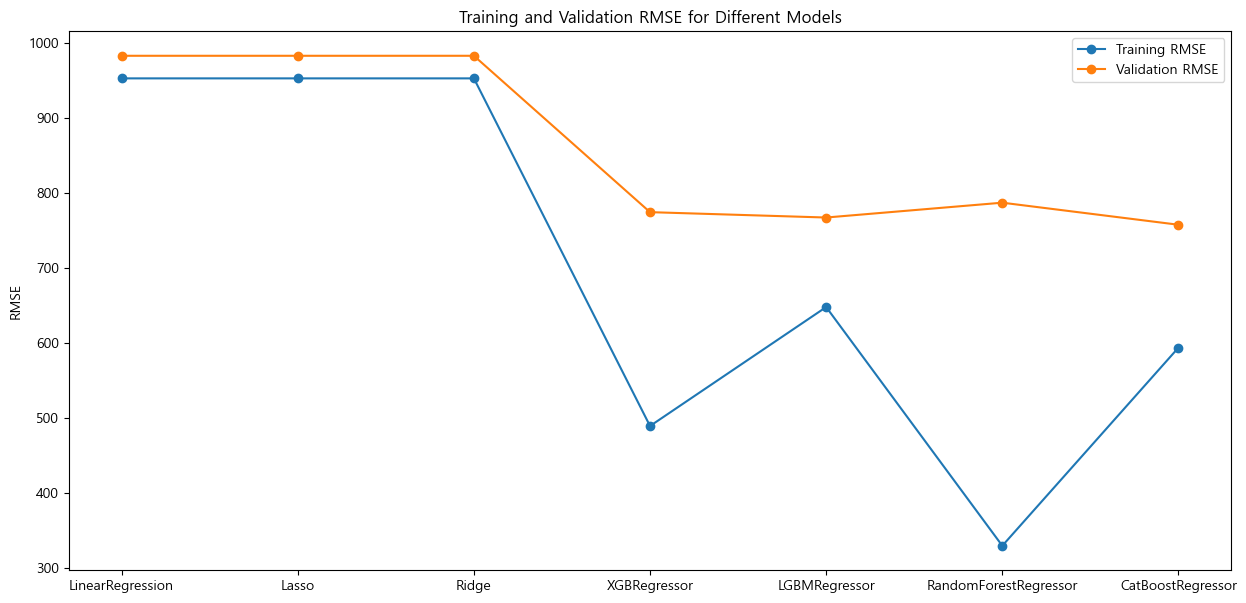

In [22]:
#결과 시각화
plot_mse_for_models_line(models, X_train_scaler, y_train, X_val_scaler, y_val)

In [23]:
#모델 test평가
evaluate_models_on_test(models, X_test_scaler, y_test)

Model Test Performance Evaluation:

Model                 	Test RMSE		Test R²
-------------------------------------------------------------------------------------
LinearRegression      	967.5171		62.76%
Lasso                 	967.5050		62.76%
Ridge                 	967.5196		62.76%
XGBRegressor          	757.8711		77.15%
LGBMRegressor         	756.0173		77.26%
RandomForestRegressor 	778.2710		75.90%
CatBoostRegressor     	732.1284		78.68%


# xgboost early stop

[0]	validation_0-rmse:3654.69938	validation_1-rmse:3657.39180
[1]	validation_0-rmse:2634.29107	validation_1-rmse:2635.85319
[2]	validation_0-rmse:1941.90922	validation_1-rmse:1951.24032
[3]	validation_0-rmse:1476.08151	validation_1-rmse:1498.92348
[4]	validation_0-rmse:1177.17878	validation_1-rmse:1211.61052
[5]	validation_0-rmse:990.59881	validation_1-rmse:1039.65932
[6]	validation_0-rmse:878.82490	validation_1-rmse:938.56142
[7]	validation_0-rmse:807.58022	validation_1-rmse:879.99894
[8]	validation_0-rmse:768.15608	validation_1-rmse:849.05757
[9]	validation_0-rmse:740.40331	validation_1-rmse:827.53297
[10]	validation_0-rmse:724.71636	validation_1-rmse:817.47339
[11]	validation_0-rmse:714.06612	validation_1-rmse:811.95106
[12]	validation_0-rmse:706.51948	validation_1-rmse:803.29375
[13]	validation_0-rmse:699.25233	validation_1-rmse:801.08356
[14]	validation_0-rmse:686.29769	validation_1-rmse:788.57122
[15]	validation_0-rmse:681.35198	validation_1-rmse:787.98058
[16]	validation_0-rmse:

c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[22]	validation_0-rmse:649.45569	validation_1-rmse:775.37352
[23]	validation_0-rmse:646.33189	validation_1-rmse:776.09822
[24]	validation_0-rmse:642.30390	validation_1-rmse:771.69933
[25]	validation_0-rmse:637.47378	validation_1-rmse:771.37147
[26]	validation_0-rmse:634.45370	validation_1-rmse:771.43383
[27]	validation_0-rmse:634.13012	validation_1-rmse:771.53111
[28]	validation_0-rmse:628.46513	validation_1-rmse:769.60801
[29]	validation_0-rmse:622.85272	validation_1-rmse:770.14479
[30]	validation_0-rmse:620.32144	validation_1-rmse:768.63687
[31]	validation_0-rmse:617.02238	validation_1-rmse:768.21223
[32]	validation_0-rmse:614.96263	validation_1-rmse:767.42702
[33]	validation_0-rmse:610.52813	validation_1-rmse:765.68656
[34]	validation_0-rmse:607.31322	validation_1-rmse:764.01757
[35]	validation_0-rmse:603.72879	validation_1-rmse:764.09662
[36]	validation_0-rmse:599.56116	validation_1-rmse:765.06604
[37]	validation_0-rmse:597.23889	validation_1-rmse:765.50228
[38]	validation_0-rmse:5

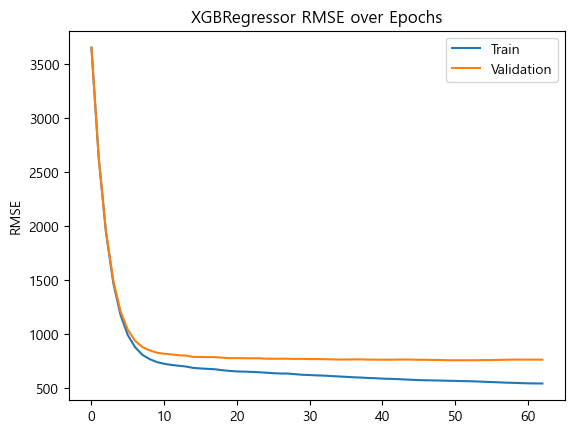

Xgboost Best Epoch:  52


In [24]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


reg_xgb = XGBRegressor()
eval_set = [(X_train_scaler, y_train), (X_val_scaler, y_val)]
reg_xgb.fit(X_train_scaler, y_train, eval_metric="rmse", eval_set=eval_set,
            early_stopping_rounds=10, verbose=True)
# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()

best_epoch = reg_xgb.best_iteration
print("Xgboost Best Epoch: ", best_epoch)

# xgboost best_iteration으로 test 진행(EPOCH 38)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# 테스트 데이터셋에 대한 예측 수행 (최적의 에포크를 사용)
pred_test = reg_xgb.predict(X_test_scaler, iteration_range=(0, best_epoch + 1))

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = sqrt(mse_test)  # RMSE 계산
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("XGBoost Test RMSE: ", rmse_test)
print("XGBoost Test R² Score: {:.2f}%".format(r2_test * 100))


XGBoost Test RMSE:  748.5243655959149
XGBoost Test R² Score: 77.71%


# light gbm early stop 적용

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[150]	valid_0's rmse: 752.682	valid_0's l2: 566530


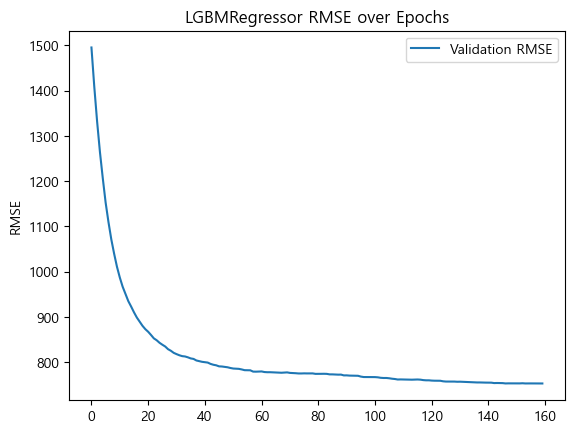

Best Iteration:  150


In [26]:
from lightgbm import LGBMRegressor, early_stopping
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1, n_estimators=200)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_val_scaler, y_val)]  # Evaluation set for early stopping

# Fit the model with early stopping
reg_lgbm.fit(X_train_scaler, y_train, eval_metric="rmse", eval_set=eval_set,
             callbacks=[early_stopping(stopping_rounds=10)])

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['valid_0']['rmse'])  # Adjust the key based on your evals_result structure
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()

# Best iteration
best_iteration = reg_lgbm.best_iteration_
print("Best Iteration: ", best_iteration)


# LightGBM best_iteration으로 test 진행(EPOCH 131)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# 테스트 데이터셋에 대한 예측 수행
pred_test = reg_lgbm.predict(X_test_scaler, num_iteration=best_iteration)

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = sqrt(mse_test)  # RMSE 계산
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("LightGBM Test RMSE: ", rmse_test)
print("LightGBM Test R² Score: {:.2f}%".format(r2_test * 100))


LightGBM Test RMSE:  740.9357945919038
LightGBM Test R² Score: 78.16%


# 아래 코드에서 ipywidgets오류나면 설치하기

In [28]:
#pip install ipywidgets

# catboost early stop

In [29]:
from catboost import CatBoostRegressor

# CatBoost 모델 초기화
reg_catboost = CatBoostRegressor(verbose=0, n_estimators=200, eval_metric='RMSE')

# Evaluation set for early stopping
eval_set = [(X_val_scaler, y_val)]

# 모델 훈련 (학습 과정 시각화)
reg_catboost.fit(X_train_scaler, y_train, eval_set=eval_set, early_stopping_rounds=10, plot=True)

# 최적의 반복 횟수 추출
best_iteration_catboost = reg_catboost.get_best_iteration()

print(best_iteration_catboost)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

195


In [30]:
# 테스트 데이터셋에 대한 예측 수행
pred_test_catboost = reg_catboost.predict(X_test_scaler, ntree_end=best_iteration_catboost)

# 테스트 데이터셋에 대한 성능 평가
mse_test_catboost = mean_squared_error(y_test, pred_test_catboost)
rmse_test_catboost = sqrt(mse_test_catboost)
r2_test_catboost = r2_score(y_test, pred_test_catboost)

# 결과 출력
print("CatBoost Test RMSE: ", rmse_test_catboost)
print("CatBoost Test R² Score: {:.2f}%".format(r2_test_catboost * 100))

CatBoost Test RMSE:  737.653014633578
CatBoost Test R² Score: 78.35%


# Random Forest Grid Search

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Random Forest 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리의 개수
    'max_features': ['auto', 'sqrt', 'log2'],  # 분할에 사용하는 특성의 수
    'max_depth': [4, 6, 8, 10, 12],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]  # 잎 노드에 있어야 하는 최소 샘플 수
}


# Random Forest grid search 오래걸려서 길게는 안 돌려봄

In [32]:
# # Random Forest 회귀 모델 생성
# rf = RandomForestRegressor(random_state=42)

# # GridSearchCV 객체 생성
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=0, scoring='neg_mean_squared_error')

# # Grid Search 수행
# grid_search.fit(X_train_scaler, y_train)

# # 최적의 매개변수 출력
# print("Best Parameters:", grid_search.best_params_)

# # 최적 매개변수로 훈련된 모델 추출
# best_rf = grid_search.best_estimator_

# # 테스트 데이터셋에 대한 예측 수행
# pred_test = best_rf.predict(X_test_scaler)

# # 성능 평가
# mse_test = mean_squared_error(y_test, pred_test)
# rmse_test = sqrt(mse_test)
# r2_test = r2_score(y_test, pred_test)

# # 결과 출력
# print("Optimized Random Forest Test RMSE: ", rmse_test)
# print("Optimized Random Forest Test R² Score: {:.2f}%".format(r2_test * 100))


# 분석

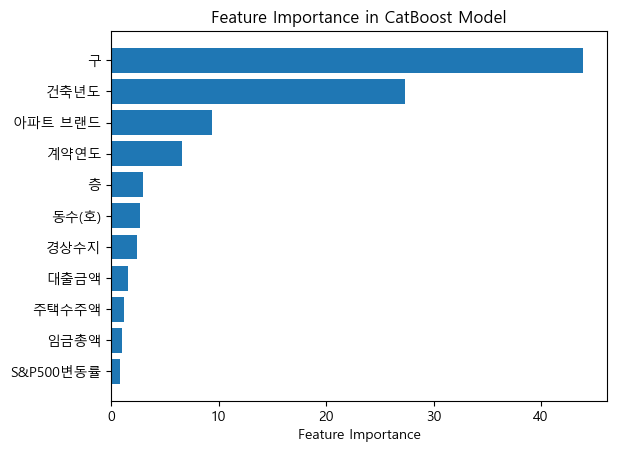

In [33]:
import matplotlib.pyplot as plt

# 데이터셋의 특성(열) 이름을 가져옵니다.
features = X_train[select_columns].columns

# 특성 중요도를 얻고 정렬합니다.
feature_importances = reg_catboost.get_feature_importance() #앞에 모델만 바꾸면 계속 나올것 같음!
sorted_idx = feature_importances.argsort()

# 특성 중요도를 시각화합니다.
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in CatBoost Model')
plt.show()



In [34]:
#shap 없다면,
# pip install shap

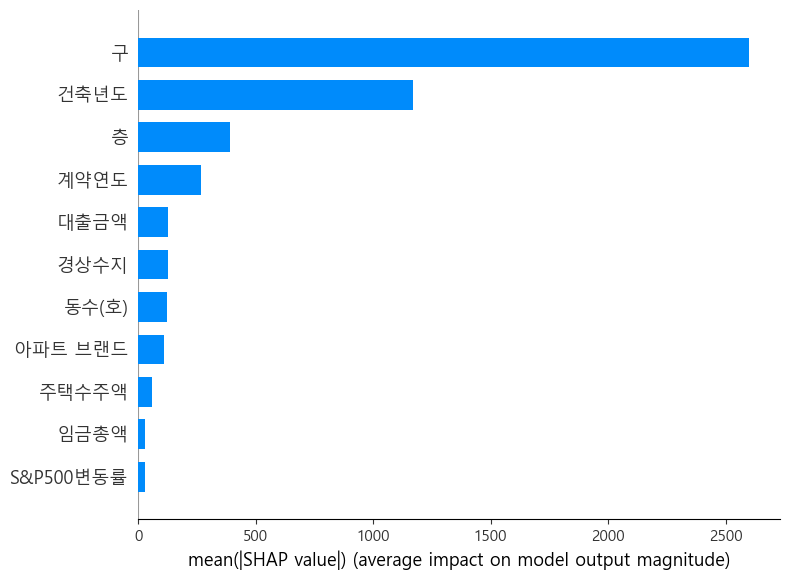

In [35]:
import shap

# SHAP 값 계산
explainer = shap.TreeExplainer(reg_catboost)
shap_values = explainer.shap_values(X_train)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_train, plot_type="bar")


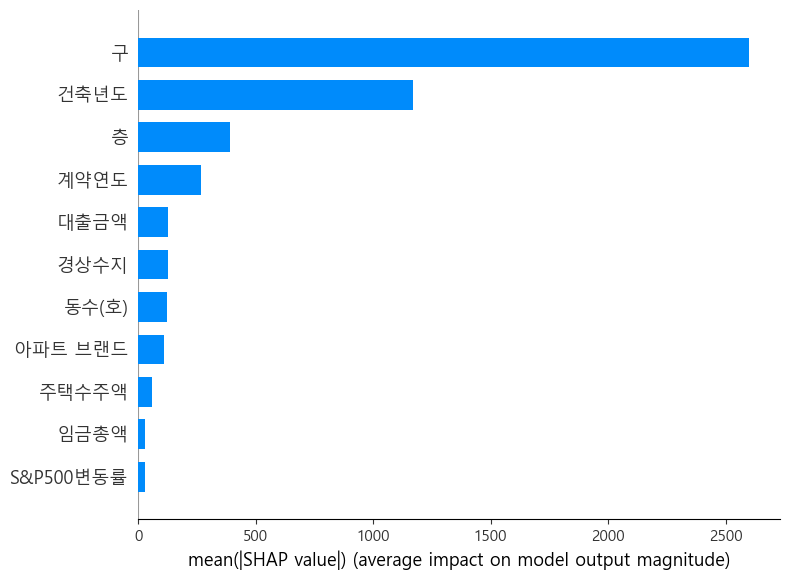

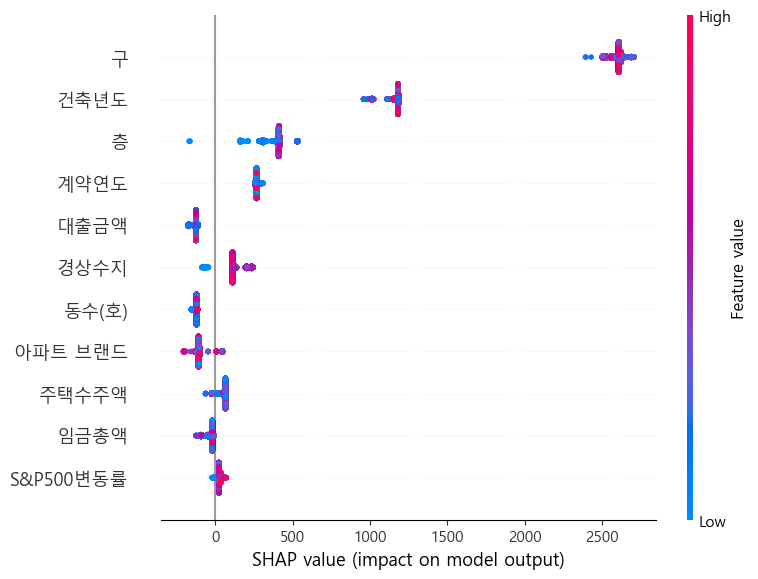

In [36]:
explainer = shap.TreeExplainer(reg_catboost)
shap_values = explainer.shap_values(X_train)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_train, plot_type="bar")

# 추가적으로, feature의 영향을 더 자세히 보기 위해 다음과 같은 플롯도 사용할 수 있습니다.
shap.summary_plot(shap_values, X_train)